# Project: Stock Price Predicton

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('stock_data/AAL.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Date   Open   High    Low  Close      Volume  Ex-Dividend  \
0  2005-09-27  21.05  21.40  19.10  19.30   2576944.0          0.0   
1  2005-09-28  19.30  20.53  19.20  20.50  15409920.0          0.0   
2  2005-09-29  20.40  20.58  20.10  20.21   2890617.0          0.0   
3  2005-09-30  20.26  21.05  20.18  21.01   8373458.0          0.0   
4  2005-10-03  20.90  21.75  20.90  21.50   2836193.0          0.0   

   Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
0          1.0  54.695101  55.604521  49.628334   50.148003   961200.112  
1          1.0  50.148003  53.343963  49.888168   53.266013  5747900.160  
2          1.0  53.006179  53.473881  52.226676   52.512494  1078200.141  
3          1.0  52.642411  54.695101  52.434544   54.591168  3123299.834  
4          1.0  54.305350  56.513941  54.305350   55.864355  1057899.989  


Open   --- mean : 25.57929481529488   	 Std:  17.35028380085261   	 Max:  62.7   	 Min:  1.81
High   --- mean : 26.051313512637

In [2]:
data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3086.000000,3086.000000,3086.000000,3086.000000,3.086000e+03,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3.086000e+03
mean,25.579295,26.051314,25.083090,25.563606,1.484441e+07,0.000421,0.999797,43.930146,44.827116,42.970354,43.886247,7.588166e+06
std,17.353096,17.568051,17.124985,17.353267,1.307596e+07,0.006478,0.011287,32.242222,32.786358,31.625327,32.218291,6.393405e+06
min,1.810000,2.030000,1.450000,1.760000,3.713140e+05,0.000000,0.373000,4.702999,5.274634,3.767596,4.573082,1.385001e+05
25%,8.805000,9.055000,8.502500,8.762500,6.804400e+06,0.000000,1.000000,22.878402,23.527988,22.092404,22.767973,3.871550e+06
50%,23.605000,24.115000,22.880000,23.445000,1.144015e+07,0.000000,1.000000,37.417690,38.046546,36.736829,37.455101,6.525105e+06
75%,41.897500,42.484950,41.290000,41.877500,1.892571e+07,0.000000,1.000000,48.616523,49.302035,47.976533,48.559500,9.750975e+06
max,62.700000,63.270000,62.000000,62.950000,2.107003e+08,0.100000,1.000000,162.916050,164.397105,161.097211,163.565636,1.377672e+08


In [3]:
data.isnull().any().any(), data.shape
data.isnull().sum(axis=0)

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

**Step 2 :** Remove Unncessary data.

In [4]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item   Open  Close     Volume
0     0  52.42  52.03  2680572.0
1     1  52.45  52.46  1576661.0
2     2  52.80  52.40  2770411.0
3     3  52.35  52.85  2772279.0
4     4  52.72  52.59  2420149.0
---
      Item   Open  Close      Volume
3081  3081  20.90  21.50   2836193.0
3082  3082  20.26  21.01   8373458.0
3083  3083  20.40  20.21   2890617.0
3084  3084  19.30  20.50  15409920.0
3085  3085  21.05  19.30   2576944.0


**Step 2: ** Visualise raw data.

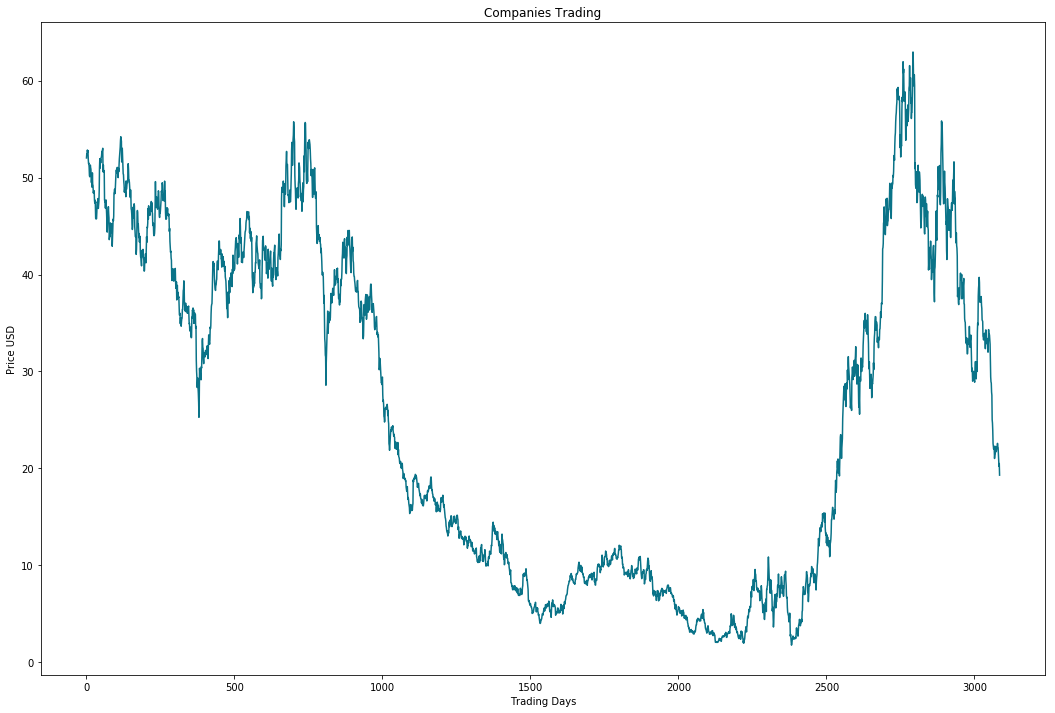

In [5]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [6]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.831171  0.821539  0.010979
1     1  0.831664  0.828567  0.005731
2     2  0.837412  0.827586  0.011406
3     3  0.830021  0.834940  0.011415
4     4  0.836098  0.830691  0.009741


Open   --- mean : 0.3903645067382955   	 Std:  0.28494471671625254   	 Max:  1.0000000000000002   	 Min:  0.0
Close  --- mean : 0.38901138226640747   	 Std:  0.2835504943024922   	 Max:  0.9999999999999998   	 Min:  0.0
Volume --- mean : 0.06881169702360183   	 Std:  0.06215901118687435   	 Max:  0.9999999999999998   	 Min:  0.0


**Step 4 :** Visualize the data again

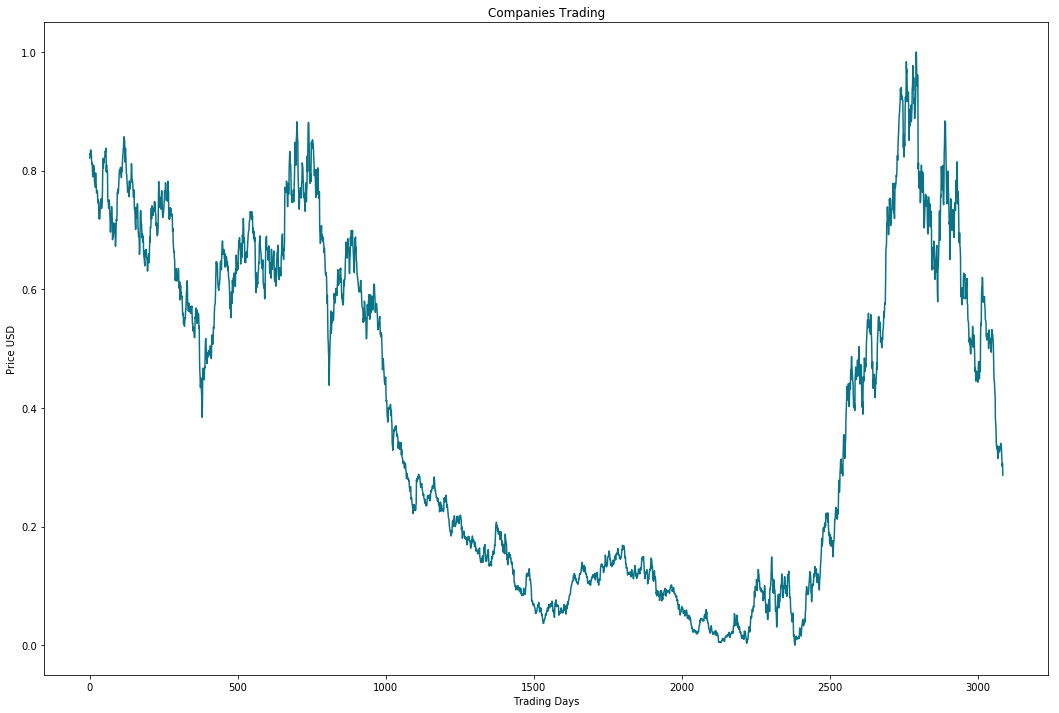

In [7]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [8]:
stocks.to_csv('preprocessed_stock_data/aal_preprocessed.csv',index= False)

# Check Point #1

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [9]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('preprocessed_stock_data/aal_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.831171,0.821539,0.010979
1,1,0.831664,0.828567,0.005731
2,2,0.837412,0.827586,0.011406
3,3,0.830021,0.834940,0.011415
4,4,0.836098,0.830691,0.009741


**Step 2:** Split data into train and test pair

In [10]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2114, 1)
y_train (2114, 1)
x_test (972, 1)
y_test (972, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [11]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [12]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

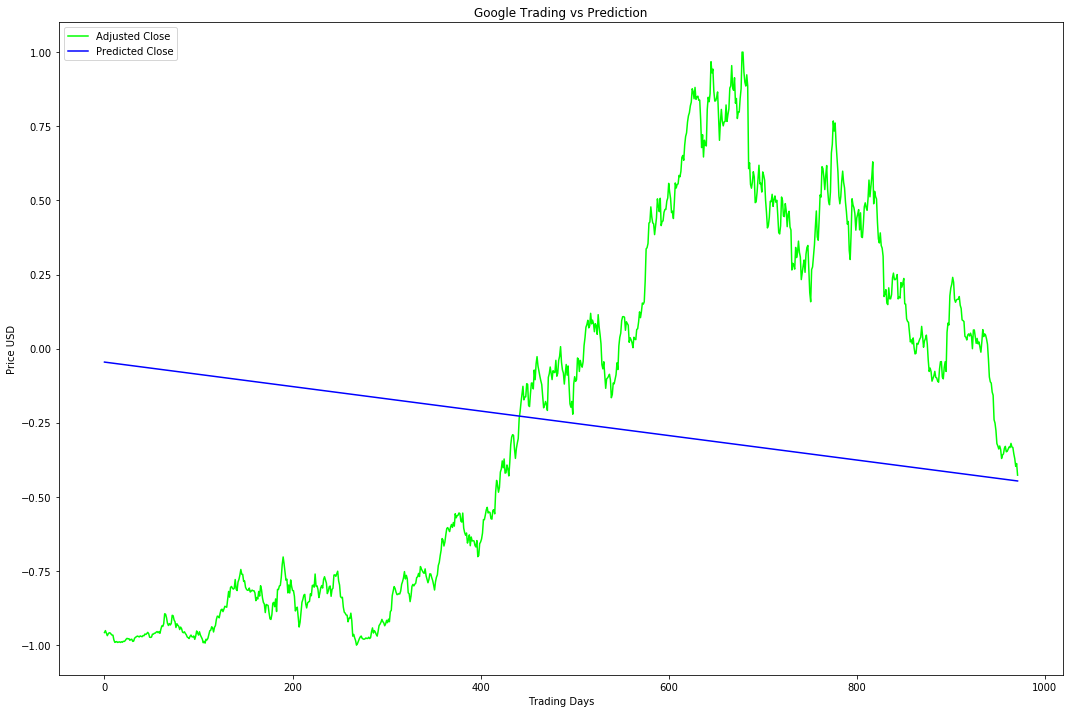

In [13]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [14]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.8690 MSE (0.9322 RMSE)
Test Score: 0.48436121 MSE (0.69596064 RMSE)


# Checkpoint #3


## Long-Short Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [15]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('preprocessed_stock_data/aal_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,Open,Close,Volume
0,0.831171,0.821539,0.010979
1,0.831664,0.828567,0.005731
2,0.837412,0.827586,0.011406
3,0.830021,0.834940,0.011415
4,0.836098,0.830691,0.009741


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [16]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2530, 50, 3)
y_train (2530,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [17]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.06220221519470215


**Step 4:** Train the model

In [18]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2403 samples, validate on 127 samples
Epoch 1/1
2403/2403 [==============================] - 14s 6ms/step - loss: 0.0076 - val_loss: 0.0019


**Step 5:** make prediction using test data

In [19]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

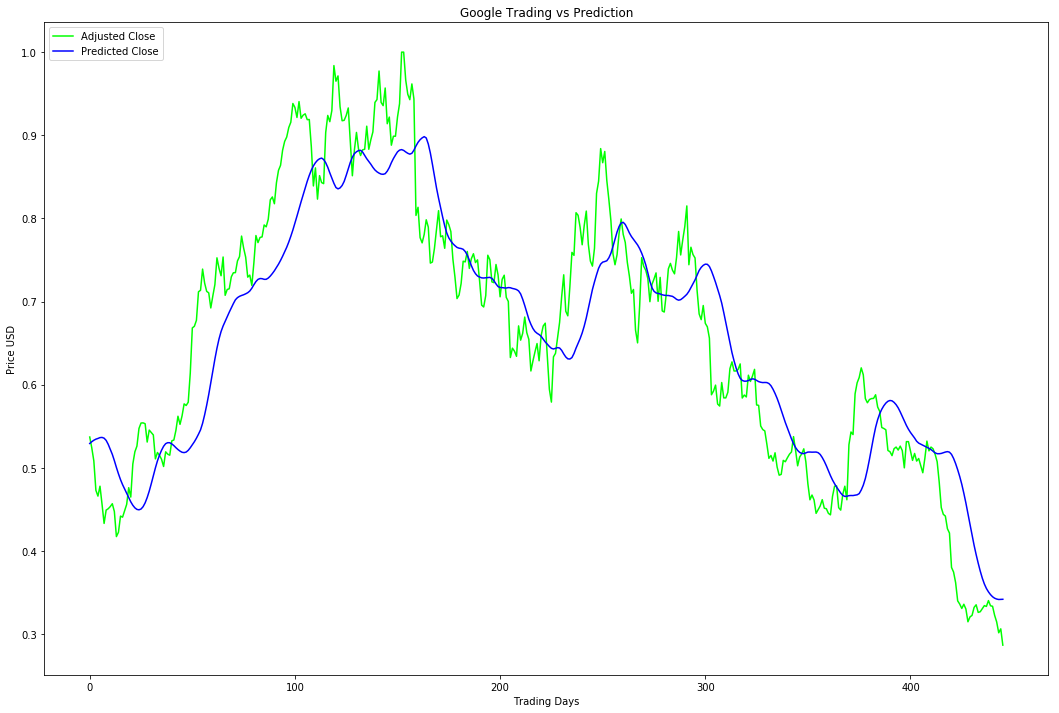

In [20]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [21]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00110977 MSE (0.03331327 RMSE)
Test Score: 0.00496445 MSE (0.07045886 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [22]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.04349112510681152


**Step 2: ** Train improved LSTM model

In [23]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2403 samples, validate on 127 samples
Epoch 1/5
 - 11s - loss: 0.0247 - val_loss: 0.0020
Epoch 2/5
 - 7s - loss: 0.0025 - val_loss: 0.0018
Epoch 3/5
 - 10s - loss: 0.0021 - val_loss: 0.0017
Epoch 4/5
 - 9s - loss: 0.0018 - val_loss: 0.0016
Epoch 5/5
 - 9s - loss: 0.0019 - val_loss: 0.0020


**Step 3:** Make prediction on improved LSTM model

In [24]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

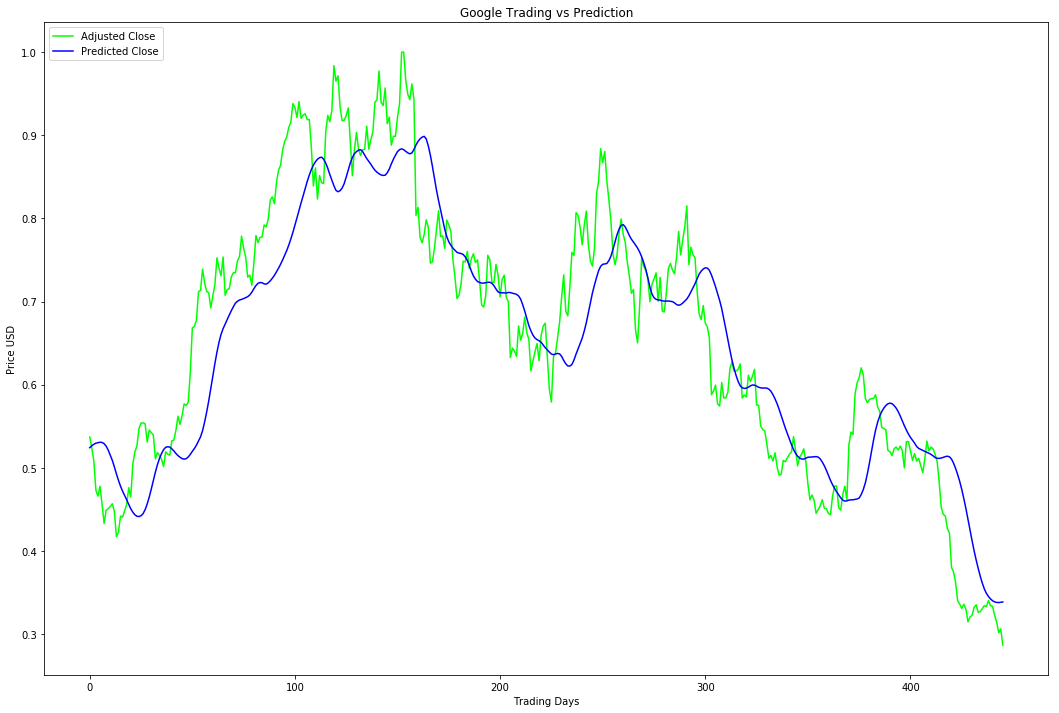

In [25]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [26]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00118990 MSE (0.03449487 RMSE)
Test Score: 0.00503292 MSE (0.07094311 RMSE)
